In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
# All font sizes are set to 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

In [3]:
np.random.seed(121)

N = 1000
std = 0.6

bananas = pd.DataFrame({
    'length' : np.random.normal(8, std, N),
    'width' : np.random.normal(4, std, N),
    'class' : np.zeros(N, dtype='int')
})

apples = pd.DataFrame({
    'length' : np.random.normal(6, std, N),
    'width' : np.random.normal(6, std, N),
    'class' : np.ones(N, dtype='int')
})

fruits = pd.concat([bananas, apples])

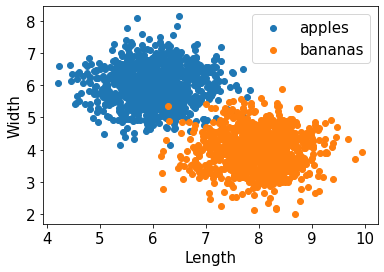

In [4]:
plt.scatter(x= apples['length'], y= apples['width'], label= 'apples')
plt.scatter(x= bananas['length'], y=bananas['width'], label='bananas')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

### The above codes are equivalent to the following codes. For data frames( pandas Object) can be assigned directly by column name ###
# plt.scatter(x='length', y='width', data=apples, label='apples')
# plt.scatter(x='length', y='width', data=bananas, label='bananas')
# plt.legend()
# plt.show()

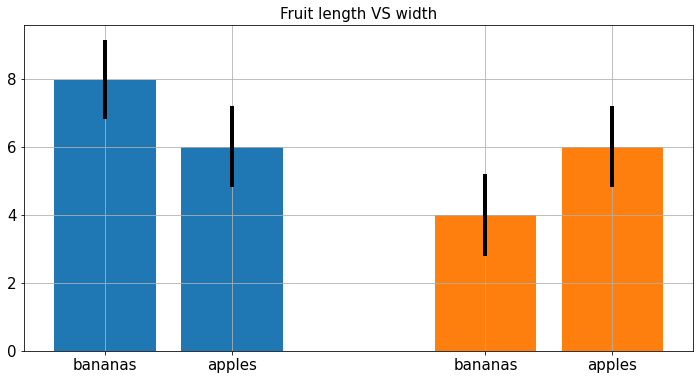

In [5]:
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]

height = [fruits.loc[fruits['class'] == 0, 'length'].mean(),
          fruits.loc[fruits['class'] == 1, 'length'].mean(),
          fruits.loc[fruits['class'] == 0, 'width'].mean(),
          fruits.loc[fruits['class'] == 1, 'width'].mean()]

yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(),
        2*fruits.loc[fruits['class'] == 1, 'length'].std(),
        2*fruits.loc[fruits['class'] == 0, 'width'].std(),
        2*fruits.loc[fruits['class'] == 1, 'width'].std()]

color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

plt.figure(figsize=(12, 6))
plt.bar(x= x,
        height=height,
        color=color,
        width=0.4,
        error_kw={'lw' : 4},
        yerr=yerr)

plt.xticks(ticks=x, labels= labels)
plt.title('Fruit length VS width')
plt.grid()
plt.show()

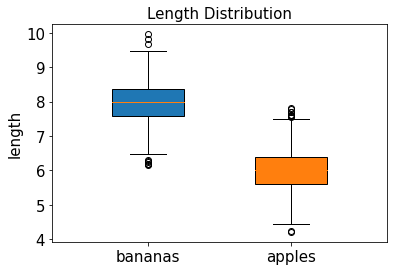

In [6]:
fea = 'length'

plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor' : 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])

plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])

plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution')
plt.show()

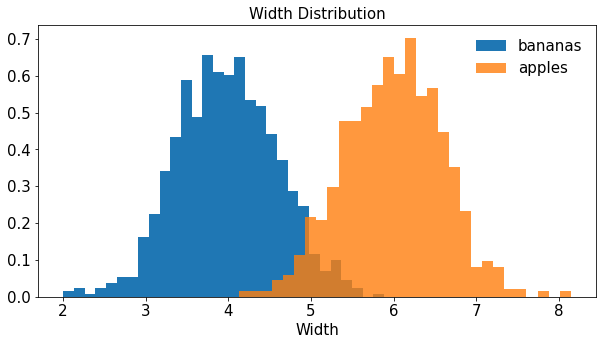

In [7]:
fea = 'width'

plt.figure(figsize=(10, 5))
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas')

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples', alpha=0.8)

plt.legend(frameon=False)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.show()

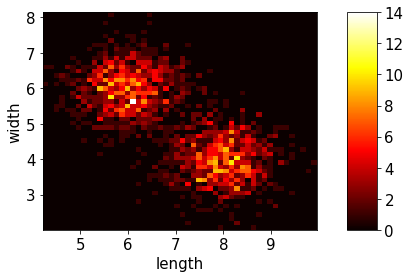

In [8]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=50, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)
plt.show()

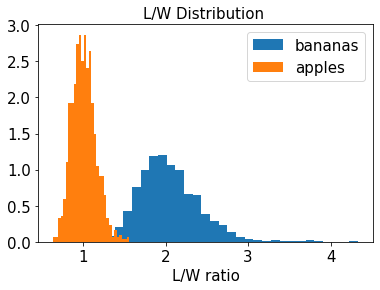

In [9]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples',)

plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')
plt.show()

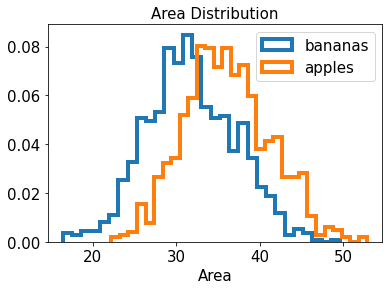

In [10]:
fea = 'area'
fruits[fea] = fruits['length'] * fruits['width']

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')

plt.title('Area Distribution')
plt.legend()
plt.xlabel('Area')
plt.show()

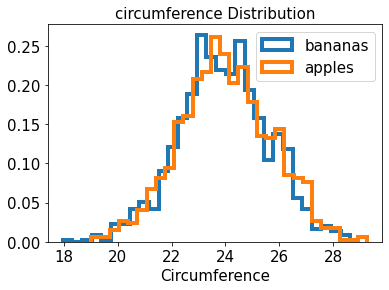

In [11]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length'] + fruits['width'])

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')

plt.title('circumference Distribution')
plt.legend()
plt.xlabel('Circumference')
plt.show()

In [13]:
# Significance test

fea = 'L/W'
fruits[fea] = fruits['length'] / fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=82.438425661083, pvalue=0.0)

In [14]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-18.33979554877528, pvalue=1.4737736564093967e-69)

In [15]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-1.3170522756675043, pvalue=0.1879721312693096)